# Problem 1

## Question (a)

### Parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
gamma = 0.8
x0 = 20.0
sigma = 0.4
r = 0.05
T = 0.5
L1 = 15.0
L2 = 25.0
dt = 0.01

### Implicit FD Scheme

In [2]:
# Return a matrix whose entries are numerical solution to the PDE
# Rows correspond to time t and columns correspond to state x
def implicit_FD_corridor(gamma,sigma,r,T,L1,L2,dt,dx):
    # The range of discretization
    x_min = L1
    x_max = L2
    t_min = 0
    t_max = T
    M = int(np.round((t_max - t_min) / dt))
    N = int(np.round((x_max - x_min) / dx))
    
    # Set up the matrix with M+1 rows and N+1 columns
    sol = np.zeros((M + 1,N + 1))
    
    # Set up terminal conditions
    sol[-1,:] = np.ones(N + 1)
    
    # Set up boundary conditions
    sol[:,0] = np.zeros(M + 1)
    sol[:,-1] = np.zeros(M + 1)
    
    # Build up the matrix A
    A = np.zeros((N + 1,N + 1))
    A[0,0] = 1
    A[N,N] = 1
    for i in range(1,N):
        # Set sub-diagonal entries a_i
        A[i,i - 1] = -dt / 2 * ((sigma ** 2) * ((x_min + i * dx) ** (2 * gamma))\
                                * (dx ** (-2)) - i * r )
        
        # Set diagonal entries b_i
        A[i,i] = 1 + (sigma ** 2) * ((x_min + i * dx) ** (2 * gamma))\
                                * (dx ** (-2)) * dt + r * dt
        
        # Set super-diagonal entries c_i
        A[i,i + 1] = -dt / 2 * ((sigma ** 2) * ((x_min + i * dx) ** (2 * gamma))\
                                * (dx ** (-2)) + i * r )
        
    # Compute A inverse
    A_inv = np.linalg.inv(A)
    
    # Start implicit FD scheme backwardly in time
    for time in range(M,0,-1):
        prev_V = np.matmul(A_inv,sol[time,:])
        sol[time - 1,:] = prev_V
    
    return sol

In [3]:
dx_lst = [0.1,0.05,0.02]
print('Use implicit finite difference scheme:')
for dx in dx_lst:
    sol = implicit_FD_corridor(gamma,sigma,r,T,L1,L2,dt,dx)
    # Now we want the value when x0 = 20, t = 0
    # Find column index for x0 = 20
    col_ind = int(np.round((x0 - L1) / dx))
    #x_plot = np.linspace(15,25,int(10/dx) + 1)
    print('When dx is ' + str(dx) + ', option price is ' + str(sol[0,col_ind]))

Use implicit finite difference scheme:
When dx is 0.1, option price is 0.7648187983705848
When dx is 0.05, option price is 0.7648596843555147
When dx is 0.02, option price is 0.7648711318489099


### Crank-Nicolson Scheme

In [4]:
# Return a matrix whose entries are numerical solution to the PDE
# Rows correspond to time t and columns correspond to state x
def Crank_Nicolson_corridor(gamma,sigma,r,T,L1,L2,dt,dx):
    # The range of discretization
    x_min = L1
    x_max = L2
    t_min = 0
    t_max = T
    M = int(np.round((t_max - t_min) / dt))
    N = int(np.round((x_max - x_min) / dx))
    
    # Set up the matrix with M+1 rows and N+1 columns
    sol = np.zeros((M + 1,N + 1))
    
    # Set up terminal conditions
    sol[-1,:] = np.ones(N + 1)
    
    # Set up boundary conditions
    sol[:,0] = np.zeros(M + 1)
    sol[:,-1] = np.zeros(M + 1)
    
    # Build up the matrix A and B
    A = np.zeros((N + 1,N + 1))
    B = np.zeros((N + 1,N + 1))
    A[0,0] = 1
    A[N,N] = 1
    B[0,0] = 1
    B[N,N] = 1
    for i in range(1,N):
        # Set sub-diagonal entries a_i
        a = dt / 4 * ((sigma ** 2) * ((x_min + i * dx) ** (2 * gamma)) \
                      * (dx ** (-2)) - i * r )
        A[i,i - 1] = -a
        B[i,i - 1] = a
        
        # Set diagonal entries b_i
        b = -dt / 2 *( (sigma ** 2) * ((x_min + i * dx) ** (2 * gamma)) \
                      * (dx ** (-2)) + r)
        A[i,i] = 1 - b
        B[i,i] = 1 + b
        
        # Set super-diagonal entries c_i
        c = dt / 4 * ((sigma ** 2) * ((x_min + i * dx) ** (2 * gamma)) \
                      * (dx ** (-2)) + i * r )
        A[i,i + 1] = -c
        B[i,i + 1] = c
    
    # Only use inv(A) * B
    A_inv_B = np.matmul(np.linalg.inv(A),B)
    
    # Start Crank-Nicolson scheme backwardly in time
    for time in range(M,0,-1):
        prev_V = np.matmul(A_inv_B,sol[time,:])
        sol[time - 1,:] = prev_V
    
    return sol

In [5]:
dx_lst = [0.1,0.05,0.02]
print('Use Crank-Nicolson scheme:')
for dx in dx_lst:
    sol = Crank_Nicolson_corridor(gamma,sigma,r,T,L1,L2,dt,dx)
    # Now we want the value when x0 = 20, t = 0
    # Find column index for x0 = 20
    col_ind = int(np.round((x0 - L1) / dx))
    #x_plot = np.linspace(15,25,int(10/dx) + 1)
    #plt.plot(x_plot,sol[0,:])
    print('When dx is ' + str(dx) + ', option price is ' + str(sol[0,col_ind]))

Use Crank-Nicolson scheme:
When dx is 0.1, option price is 0.7640289397158996
When dx is 0.05, option price is 0.7640691696274393
When dx is 0.02, option price is 0.7640804329960916


## Compound Option

### Implicit FD Scheme

### First deal with the underlying call option

In [6]:
# Parameters for compound call
T1 = 0.25
T2 = 0.5
K1 = 2.0
K2 = 20.0
xmin = 0.0
xmax = 100.0

In [7]:
# Payoff function of the call
# Called in implicit_FD_call to solve numerically
# Return a vector as the terminal condition of the PDE set up according to the payoff
def set_call_payoff(xmin,xmax,N,K,arg):
    # Set up terminal conditions as (x - K2)_+
    stk_price = np.linspace(xmin,xmax,N + 1)
    terminal_vec = np.maximum(stk_price - K,0)
    return terminal_vec

In [8]:
# Return a matrix whose entries are numerical solution to the PDE
# Rows correspond to time t and columns correspond to state x
def implicit_FD_call(gamma,sigma,r,T,K,xmin,xmax,dt,dx,
                     set_payoff,set_payoff_arg):
    # The range of discretization
    t_min = 0
    t_max = T
    M = int(np.round((t_max - t_min) / dt))
    N = int(np.round((xmax - xmin) / dx))
    
    # Set up the matrix with M+1 rows and N+1 columns
    sol = np.zeros((M + 1,N + 1))
    
    # Set up terminal conditions
    sol[-1,:] = set_payoff(xmin,xmax,N,K,set_payoff_arg)
    
    # Build up the matrix A
    A = np.zeros((N + 1,N + 1))
    A[0,0] = 1
    A[N,N] = 1
    for i in range(1,N):
        # Set sub-diagonal entries a_i
        A[i,i - 1] = -dt / 2 * ((sigma ** 2) * ((xmin + i * dx) ** (2 * gamma))\
                                * (dx ** (-2)) - i * r )
        
        # Set diagonal entries b_i
        A[i,i] = 1 + (sigma ** 2) * ((xmin + i * dx) ** (2 * gamma)) * (dx ** (-2))\
                                * dt + r * dt
        
        # Set super-diagonal entries c_i
        A[i,i + 1] = -dt / 2 * ((sigma ** 2) * ((xmin + i * dx) ** (2 * gamma)) \
                                * (dx ** (-2)) + i * r )
        
    # Compute A inverse
    A_inv = np.linalg.inv(A)
    
    # Start implicit FD scheme backwardly in time
    for time in range(M,0,-1):
        # Set up boundary condition vector
        bound_val = K * np.exp(-r * (T - time * dt)) * (1 - np.exp(-r * dt))
        g = np.zeros(N + 1)
        g[-1] = bound_val
        
        # Update
        prev_V = np.matmul(A_inv,(sol[time,:] + g))
        sol[time - 1,:] = prev_V
    return sol

### Plot the Option Price Curves to Check

Text(0.5, 1.0, 'Call Price v.s. Stock Price')

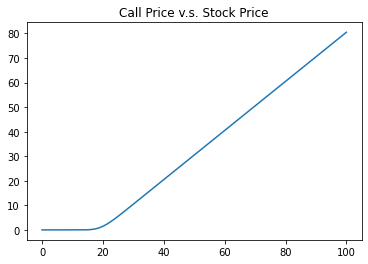

In [9]:
dx = 0.02
sol = implicit_FD_call(gamma,sigma,r,T2,K2,xmin,xmax,dt,dx,set_call_payoff,0)
# Find column index for x0 = 20
col_ind = int(np.round((x0 - xmin) / dx))
option_price_stk_price = sol[0,:]
option_price_time = sol[:,col_ind]

# Plot to check the relationship between option price and stock price
x_plot = np.linspace(xmin,xmax,int((xmax - xmin) / dx) + 1)
plt.plot(x_plot,option_price_stk_price)
plt.title('Call Price v.s. Stock Price')

Text(0.5, 1.0, 'Call Price v.s. Time when Initial Stock Price is 20')

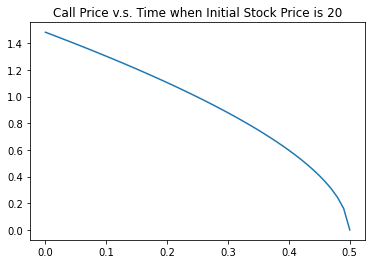

In [10]:
# Plot to check the relationship between option value and time
t_plot = np.linspace(0,T2,int(T2 / dt) + 1)
plt.plot(t_plot,option_price_time)
plt.title('Call Price v.s. Time when Initial Stock Price is 20')

### Set up payoff function for compound call

In [11]:
# Payoff function of the compound call
# Called in implicit_FD_call to solve numerically
# Return a vector as the terminal condition of the PDE set up according to the payoff
def set_compound_call_payoff(xmin,xmax,N,K,arg):
    # Set up terminal conditions as (val - K2)_+ where val is the 
    # value of underlying call at time T1
    # The underlying call value at T1 is delivered as arg
    terminal_vec = np.maximum(arg - K,0)
    return terminal_vec

In [12]:
dx_lst = [0.1,0.05,0.02]
for dx in dx_lst:
    # Prepare the value at time T1 of underlying call
    call_sol = implicit_FD_call(gamma,sigma,r,T2,K2,xmin,xmax,dt,dx,set_call_payoff,0)
    row_ind = int(np.round(T1 / dt))
    
    # Underlying call value at time T1 for different stock prices
    underlying_call_val = call_sol[row_ind,:]
    
    # Compound call value
    sol = implicit_FD_call(gamma,sigma,r,T1,K1,xmin,xmax,dt,dx,
                           set_compound_call_payoff,underlying_call_val)
    # Now we want the value when x0 = 20, t = 0
    # Find column index for x0 = 20
    col_ind = int(np.round((x0 - xmin) / dx))
    option_price_time = sol[:,col_ind]
    print('When dx is ' + str(dx) + ', option price is ' + str(option_price_time[0]))

When dx is 0.1, option price is 0.37438684176953274
When dx is 0.05, option price is 0.3743954826825464
When dx is 0.02, option price is 0.37439832972225323


### Crank-Nicolson Scheme

In [13]:
# Return a matrix whose entries are numerical solution to the PDE
# Rows correspond to time t and columns correspond to state x
def Crank_Nicolson_call(gamma,sigma,r,T,K,xmin,xmax,dt,dx,set_payoff,set_payoff_arg):
    # The range of discretization
    t_min = 0
    t_max = T
    M = int(np.round((t_max - t_min) / dt))
    N = int(np.round((xmax - xmin) / dx))
    
    # Set up the matrix with M+1 rows and N+1 columns
    sol = np.zeros((M + 1,N + 1))
    
    # Set up terminal conditions as (x - K2)_+
    sol[-1,:] = set_payoff(xmin,xmax,N,K,set_payoff_arg)
    
    # Build up the matrix A and B
    A = np.zeros((N + 1,N + 1))
    B = np.zeros((N + 1,N + 1))
    A[0,0] = 1
    A[N,N] = 1
    B[0,0] = 1
    B[N,N] = 1
    for i in range(1,N):
        # Set sub-diagonal entries a_i
        a = dt / 4 * ((sigma ** 2) * ((xmin + i * dx) ** (2 * gamma))\
                      * (dx ** (-2)) - i * r )
        A[i,i - 1] = -a
        B[i,i - 1] = a
        
        # Set diagonal entries b_i
        b = -dt / 2 *( (sigma ** 2) * ((xmin + i * dx) ** (2 * gamma))\
                      * (dx ** (-2)) + r)
        A[i,i] = 1 - b
        B[i,i] = 1 + b
        
        # Set super-diagonal entries c_i
        c = dt / 4 * ((sigma ** 2) * ((xmin + i * dx) ** (2 * gamma))\
                      * (dx ** (-2)) + i * r )
        A[i,i + 1] = -c
        B[i,i + 1] = c
    
    # Compute inv(A) and inv(A) * B
    A_inv = np.linalg.inv(A)
    A_inv_B = np.matmul(A_inv,B)
    
    # Start implicit FD scheme backwardly in time
    for time in range(M,0,-1):
        # Set up boundary condition vector
        bound_val = K * np.exp(-r * (T - time * dt)) * (1 - np.exp(-r * dt))
        g = np.zeros(N + 1)
        g[-1] = bound_val
        
        # Update
        prev_V = np.matmul(A_inv_B,sol[time,:]) + np.matmul(A_inv,g)
        sol[time - 1,:] = prev_V
    return sol

In [14]:
dx_lst = [0.1,0.05,0.02]
for dx in dx_lst:
    # Prepare the value at time T1 of underlying call
    call_sol = Crank_Nicolson_call(gamma,sigma,r,T2,K2,xmin,xmax,
                                   dt,dx,set_call_payoff,0)
    row_ind = int(np.round(T1 / dt))
    underlying_call_val = call_sol[row_ind,:]
    
    # Compound call
    sol = Crank_Nicolson_call(gamma,sigma,r,T1,K1,xmin,xmax,dt,dx,
                              set_compound_call_payoff,underlying_call_val)
    # Now we want the value when x0 = 20, t = 0
    # Find column index for x0 = 20
    col_ind = int(np.round((x0 - xmin) / dx))
    option_price_time = sol[:,col_ind]
    print('When dx is ' + str(dx) + ', option price is ' + str(option_price_time[0]))

When dx is 0.1, option price is 0.3755858677807252
When dx is 0.05, option price is 0.3755870986900636
When dx is 0.02, option price is 0.3755921459195908
